<a href="https://colab.research.google.com/github/AnulikaNzewi/Project-1/blob/main/Diabetes_Prediction_System_EDA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis and Machine learning with Python on Diabetes Patients**


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).



**The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset**.


#  **Exploratory Data Analysis**

In [ ]:
#Import Libraries for analysis and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Upload CSV file to google collab
from google.colab import files
data_to_load = files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:
#Load data to dataframe
import io
df = pd.read_csv(io.BytesIO(data_to_load['diabetes.csv']))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Rounding off data to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### **Exploring Data**



In [ ]:
#Checking for unique Values
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
#checking dataset information i.e datatypes, attributes, no of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
# General Overview statistical information
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


*The Min row indicates that some important metrics have 0 which is impossible. Metrics like Glucose, Blood Pressure, Insulin, Skin thickness and BMI with zero should be replaced with null to give a clear picture of the missing data. It is important to also note insulin levels can be at 0, however, it is a rare occurence. A closer look at the attributes of the data will help us decide if Insulin at 0 should be viewed as a Null Value*

### **Data Processing and Cleaning**

Text(0.5, 1.0, 'Attribute Distribution')

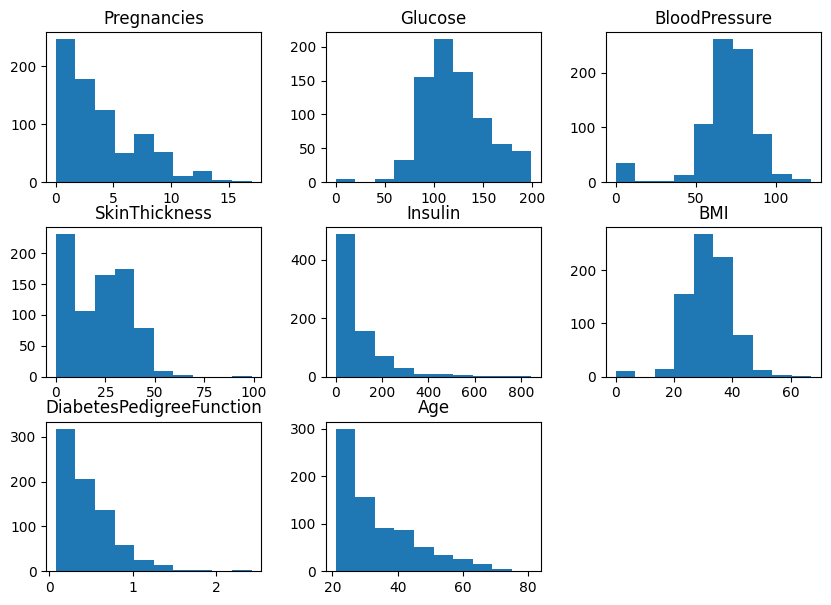

In [ ]:
#Visualization of Attribute Distribution
df1 = df.drop(columns = 'Outcome')
df1.hist(figsize = (10,7), grid = False)
plt.title("Attribute Distribution")

*Upon Closer look at the attributes, It is clear that the distribution of Insulin at 0 is too high for a case that should be a rare occurence. Glucose, Blood Pressure, BMI and Skin thickness should not be at 0 as it is humanly impossible. We will replace all 0 values within these columns to Null values*

In [ ]:
#Replacing 0 with Null Values
columns_to_replace = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, None)

In [ ]:
#Checking for NULL values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

*The distribution of Null Values within the columns indicate incomplete data collection and will adversely affect the findings of our analysis. An average value will be used to fill in the null values. We will look for outliers within the distribution to determine whether to use the mean or median values to replace the Null Values*

# **Identifying Outliers**

Identifying outliers in a dataset can assist in determining whether to use the mean or median for filling in null values. This choice is important because outliers can significantly impact the mean, making it an unreliable measure of central tendency.

*Box Plot is an effective way toidentify outliers in a data set.*

In [ ]:
# Specify the columns to include in the filter
columns_to_include = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin','BMI']

# Create a filtered DataFrame with only the selected columns
filtered_df = df[columns_to_include]

In [ ]:
# converting filtered_df to numeric values
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

<Axes: >

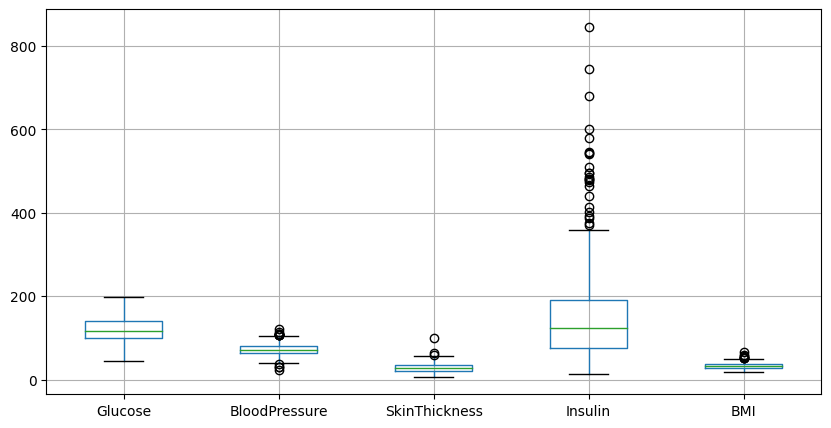

In [ ]:
#Visualizing the Box plot to show autliers in specific columns
filtered_df.boxplot(figsize =(10,5))

*All but one of the specified columns contains outliers. The median will be a more accurate value to use in replacing Null values as it is not affected by outliers.*

In [ ]:
#Checking for median of all columns
df.median()

Pregnancies                  3.00
Glucose                    117.00
BloodPressure               72.00
SkinThickness               29.00
Insulin                    125.00
BMI                         32.30
DiabetesPedigreeFunction     0.37
Age                         29.00
Outcome                      0.00
dtype: float64

In [ ]:
# Calculate the median for each column with Null values
median_values = df.median()

# Replace Null values with median values
df.fillna(median_values, inplace=True)

# Save the DataFrame with NaN values replaced by median values to a CSV file
df.to_csv('modified_dataset.csv', index=False)

In [ ]:
#Check if the median values have replaced the Null Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Checking for correlation between all variables
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.08,0.03,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.19,0.42,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1.00,0.19,0.05,0.28,-0.00,0.32,0.17
SkinThickness,0.08,0.19,0.19,1.00,0.16,0.54,0.10,0.13,0.21
Insulin,0.03,0.42,0.05,0.16,1.00,0.18,0.13,0.10,0.20
BMI,0.02,0.23,0.28,0.54,0.18,1.00,0.15,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.10,0.13,0.15,1.00,0.03,0.17
Age,0.54,0.27,0.32,0.13,0.10,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.21,0.20,0.31,0.17,0.24,1.00


# **Machine Learning**

In [ ]:
#Import Necessary libraries for Multiple regressions and Machine learning
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Choose a Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42)


In [ ]:
#Use the trained model to make predictions on your test data:
model1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Evaluate the model's performance using metrics like Mean Squared Error  and R-squared (R2):
from sklearn import metrics

y_pred = model1.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_report = metrics.classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report)


Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Accuracy: *The model accurately predicts the class label for about 74.68% of the samples in the test dataset.*

Precision: *The model predicts the positive class (1), it is precise about 63.79% of the time.*

Recall: *The model correctly identifies approximately 67.27% of the actual positive samples.*

F1 Score: *The F1-score is approximately 65.49%. It provides a single metric that considers both false positives and false negatives.*

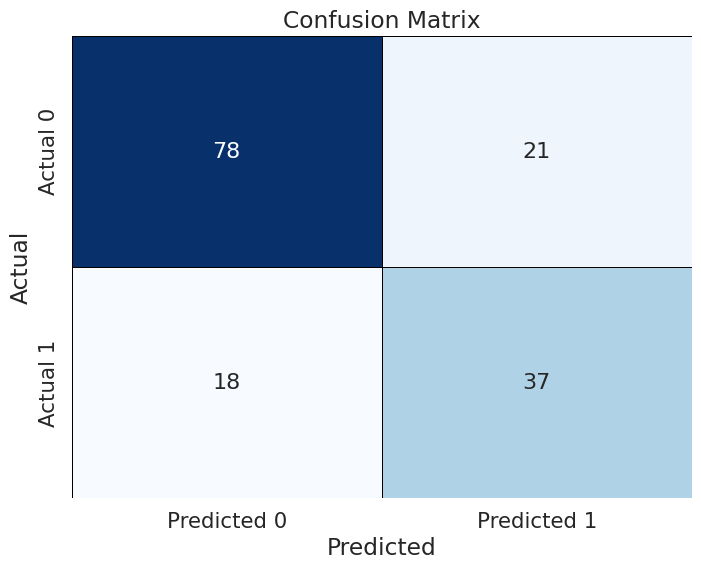

In [ ]:
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Adjust the font size for clarity
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=0.5, linecolor='black',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



*   *The top-left cell (True Negatives 78) are instances correctly predicted as the negative class (0).*
*   *The top-right cell (False positives 21) are instances predicted as the positive class (1) but actually belong to the negative class (0)*
*   *The bottom-left cell (False negatives 18) are instances predicted as the negative class (0) but actually belong to the positive class (1).*
*  *The bottom-right cell (True positives 37) are instances correctly predicted as the positive class (1).*

### **Cross-Validation**
Cross-validation is a valuable technique for assessing the model's stability. Cross-validation helps provide a more robust estimate of a model's  compared to a single train-test split.

In [ ]:
#importing library for cross validation
from sklearn.model_selection import cross_val_score, KFold

# Define your classifier (e.g., RandomForestClassifier)
classifier = RandomForestClassifier(random_state=42)

# Define the number of folds (e.g., 5-fold cross-validation)
num_folds = 5

# Create a cross-validation object (e.g., using KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')  # You can change the scoring metric

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-Validation Scores: [0.76623377 0.76623377 0.79220779 0.75816993 0.76470588]
Mean Accuracy: 0.7695102283337578
Standard Deviation of Accuracy: 0.011733148042647799



*   *The mean accuracy of approximately 76.95% indicates that the model performs reasonably well on average.*

*  *The low standard deviation of accuracy (1.17%) suggests that the model's performance is consistent and stable across different cross-validation folds, which is a positive indication of its reliability and generalization*



## **Features/Attributes Importance**
Feature importance shows the importance of each feature in a machine learning model. It is a helpful way further understand which features have the most impact on a machine learning model

In [ ]:
#Importing relevant library
import xgboost as xgb

# Train an XGBoost classifier (replace with your data and labels)
df = xgb.XGBClassifier()
df.fit(X_train, y_train)

# Get feature importance
feature_importances = df.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, feature_importances):
    print(f'{feature_name}: {importance}')


Pregnancies: 0.07937399297952652
Glucose: 0.2281760573387146
BloodPressure: 0.08454455435276031
SkinThickness: 0.09643145650625229
Insulin: 0.14020417630672455
BMI: 0.13962724804878235
DiabetesPedigreeFunction: 0.08444925397634506
Age: 0.14719325304031372


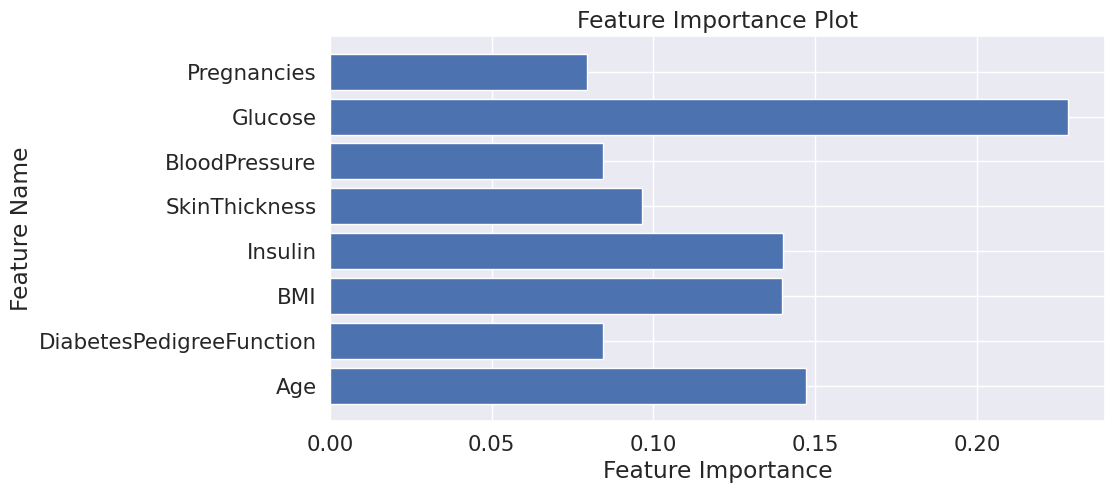

In [ ]:
# Assume X is the feature matrix
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()



*   Glucose (0.228) and Age (0.147) are the most important features, with the highest importance scores. This suggests that changes in glucose levels and Age have the most significant impact on the model's predictions.
*   Insulin (0.140) and BMI (0.140) are tied for third most important feature. This indicates that variations in insulin levels and BMI also have a notable influence on the model's predictions.

*   Skin Thickness (0.096),Blood Pressure (0.085) and Diabetes
Pedigree Function have relatively lower importance scores, indicating that they have modest impact on the model's predictions.
*   Pregnancies (0.079): Pregnancies have the lowest importance score among the features, suggesting they have the least influence on the model's predictions.

## **Saving the ML model**

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'diabetes_ml_model.pkl')

['diabetes_ml_model.pkl']


# **Key Takeaways and Summary Of findings**
## **Key Takeaways**
1. **Accuracy and Constraints**:
   - The fact that all patients in the dataset are females, of Pima Indian heritage and are at least 21 years old may affect the accuracy. This demographic limitation may affect the model's generalization to a broader population as ethnicity, age and gender affects the chances of a person getting diabetes.

2. **Data Cleaning and Processing**:
   - The dataset contains estimated values that have been inserted in place of null values. While this approach can help with accuracy by ensuring that all data points have values, it's important to consider the possible impact these estimates have on the model's performance.

3. **Feature/Attribute Importance**:
   - The model's feature importance analysis reveals that certain features, such as Glucose, Age, Insulin, and BMI, play significant roles in predicting the outcome. These features have higher importance scores, indicating a strong influence on the model's predictions.

4. **Model Evaluation**:
   - Model evaluation metrics, such as accuracy, precision, recall, and F1-score, provide insights into the model's performance. These metrics can be used to assess how well the model is at correctly classifying individuals with and without diabetes.

5. **Cross-Validation**:
   - K-fold cross-validation, was used to assess the model's stability and generalization. The mean accuracy and standard deviation of accuracy across folds further proves the stability and reliability of the model.

## **Summary**

This machine learning model was developed and optimized taking into consideration the pecularities of the data set. Various validaton techniques were used to ensure that the machine learning model was accurate and stable. Further work to improve its accuracy will include expanding the dataset to include a more diverse population, and continuously monitoring and updating the model's performance in real-world applications.